In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split




In [24]:
final_feature = pd.read_csv('deeplearning_features.csv')
final_feature_array = final_feature.to_numpy()
df = pd.read_csv('features_data.csv')
y = df.race.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_feature_array, y, test_size=0.2, random_state=21, stratify=y)


In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


race_names = np.unique(df.race.values)
plt.rcParams.update({'font.size': 16})
def DrawROC(testdata, y_s):
    y_test_binarized = label_binarize(testdata, classes=np.unique(df.race.values))
    n_classes = y_test_binarized.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_s[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of {0} (area = {1:0.2f})'.format(race_names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC')
    plt.legend(loc="lower right")
    plt.show()


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

def plot_confusion_matrix(cm):
    class_names = df['race'].unique().tolist()   # 请根据您的实际情况修改类别名
    plt.figure(figsize=(10, 7))  # 设置图形的大小
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_res(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    y_score = model.predict_proba(X_test)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)    
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    plot_confusion_matrix(cm)    
    DrawROC(y_test,y_score)
    return  cm

 # convert dataframe

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33100, 28)
(33100,)
(8276, 28)
(8276,)


Accuracy: 0.318994683421943
Precision: 0.32377156346000335
Recall: 0.318994683421943
F1 Score: 0.2912875090034565
[[ 418  110  482  103  164  103]
 [ 157  212  536  173  150  152]
 [  78   17 1128  118   38    0]
 [ 137   92  665  255  133   97]
 [ 192  160  426  137  368   96]
 [ 168  166  445  174  167  259]]


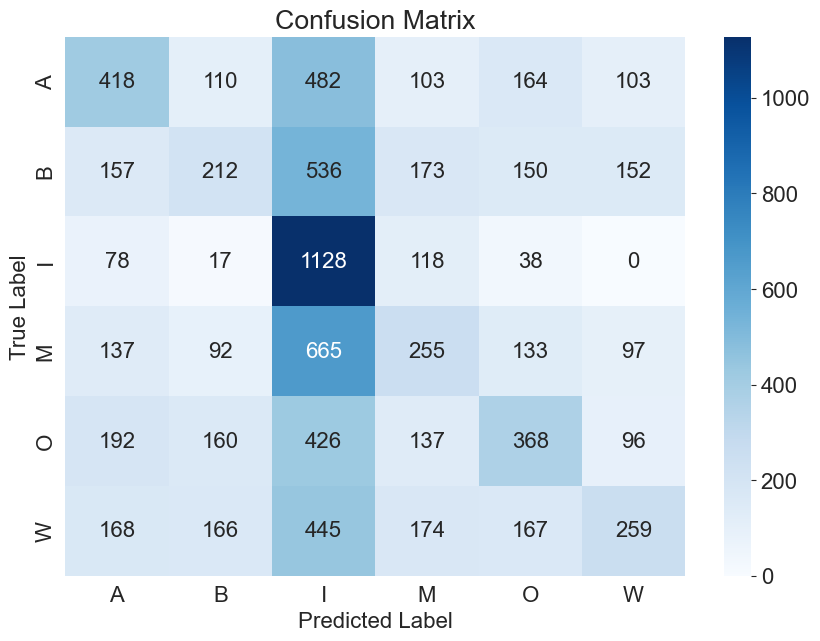

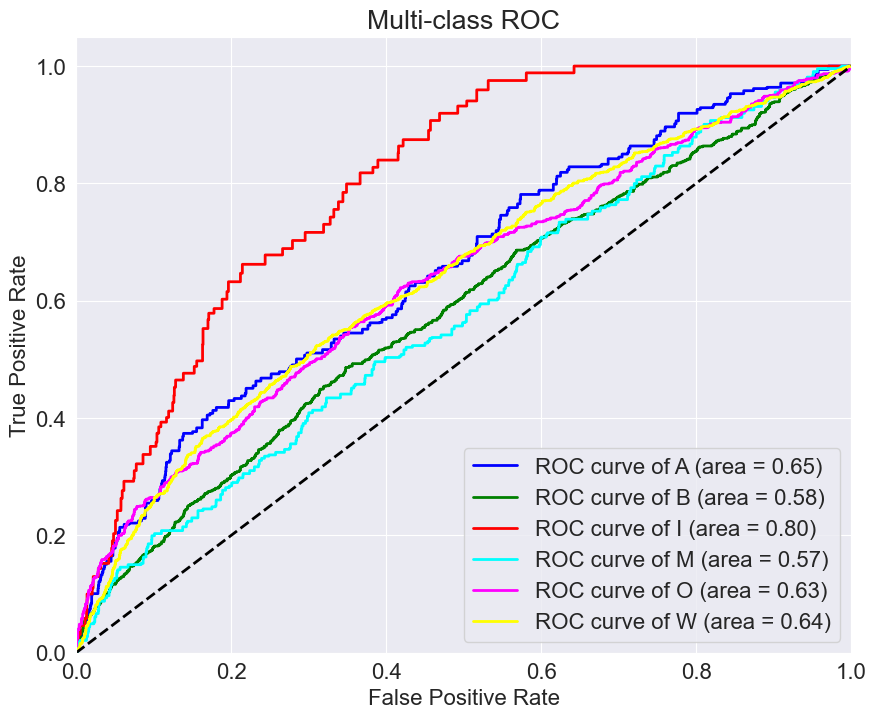

In [29]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
result1 =print_res(model1)

Accuracy: 0.2388835186080232
Precision: 0.24138011102397022
Recall: 0.2388835186080232
F1 Score: 0.219722843373301
[[723  40 121 138 153 205]
 [540 106  71 219 137 307]
 [454  91 167 184 242 241]
 [466 106  77 303 143 284]
 [480  66  87 187 296 263]
 [395  81  84 276 161 382]]


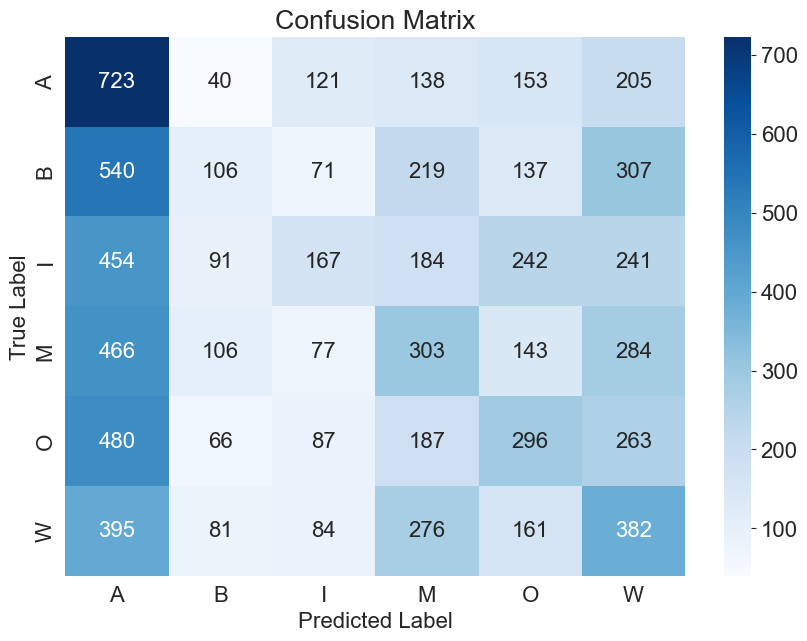

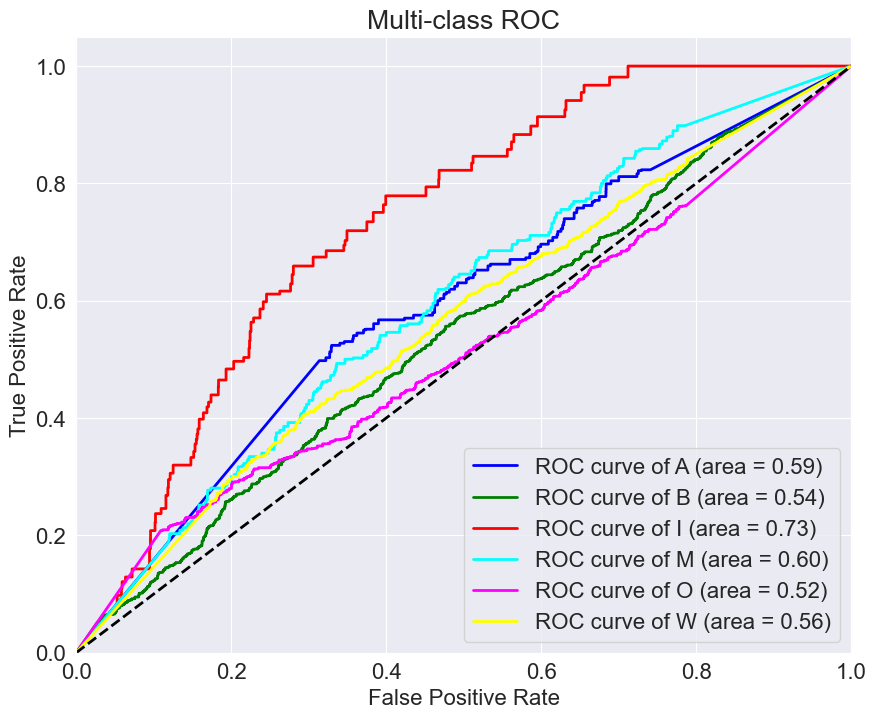

In [30]:
from sklearn.naive_bayes import MultinomialNB
nbm = MultinomialNB()
cm_mul =print_res(nbm)

Accuracy: 0.8214113098115031
Precision: 0.8069579383122342
Recall: 0.8214113098115031
F1 Score: 0.8123275603306204
[[1380    0    0    0    0    0]
 [  19  672    8   27  119  535]
 [   0    0 1379    0    0    0]
 [   0    0    0 1379    0    0]
 [   3   12    2   11 1337   14]
 [  17  513    9   44  145  651]]


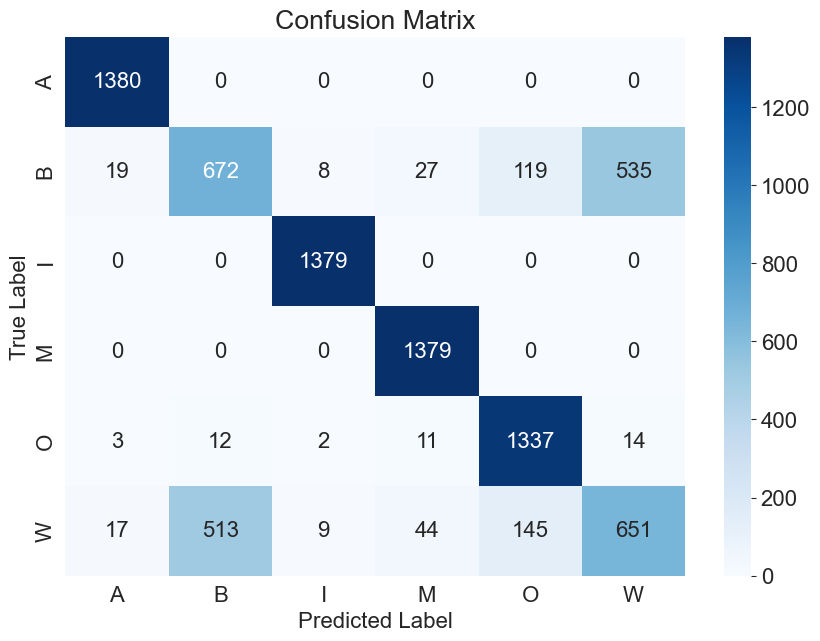

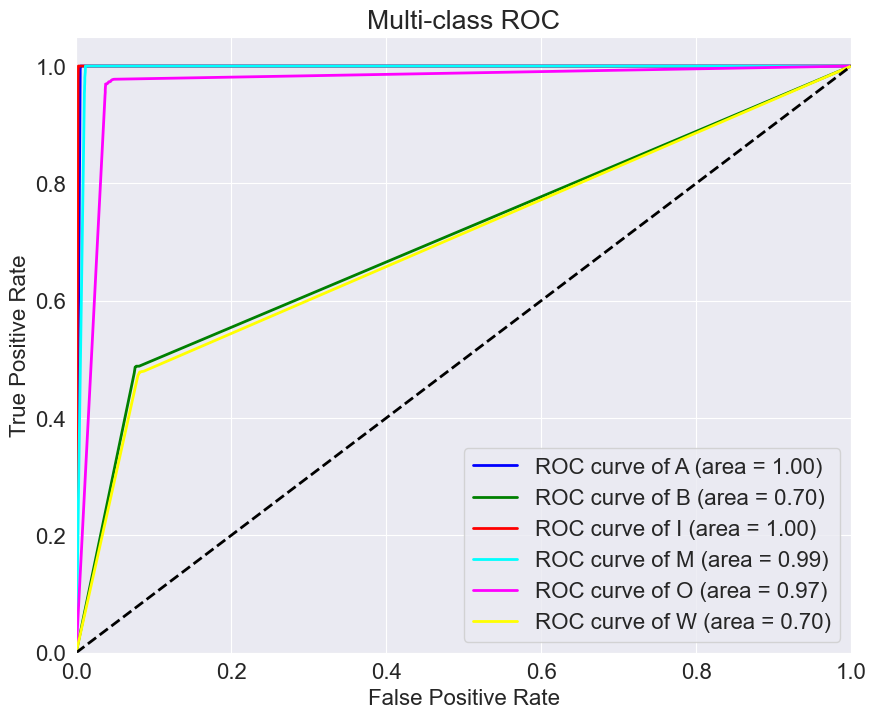

array([[1380,    0,    0,    0,    0,    0],
       [  19,  672,    8,   27,  119,  535],
       [   0,    0, 1379,    0,    0,    0],
       [   0,    0,    0, 1379,    0,    0],
       [   3,   12,    2,   11, 1337,   14],
       [  17,  513,    9,   44,  145,  651]], dtype=int64)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
print_res(dclf)

C:\yjf\software\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.2555582406959884
Precision: 0.27278276794282963
Recall: 0.2555582406959884
F1 Score: 0.23982533473991594
[[775 123  45  74 203 160]
 [510 162  63 183 191 271]
 [476  47 198 207 274 177]
 [419 137  52 319 216 236]
 [511  92  59 136 335 246]
 [406 139  62 225 221 326]]


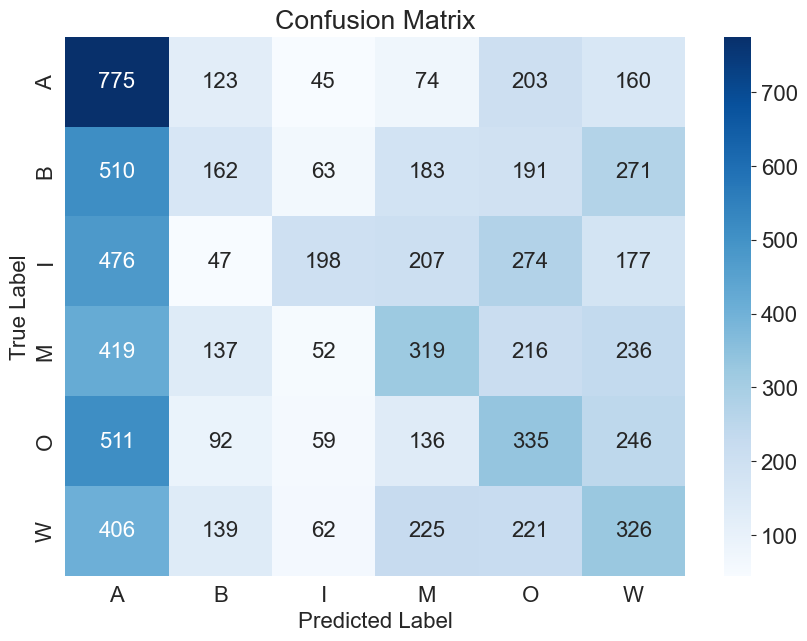

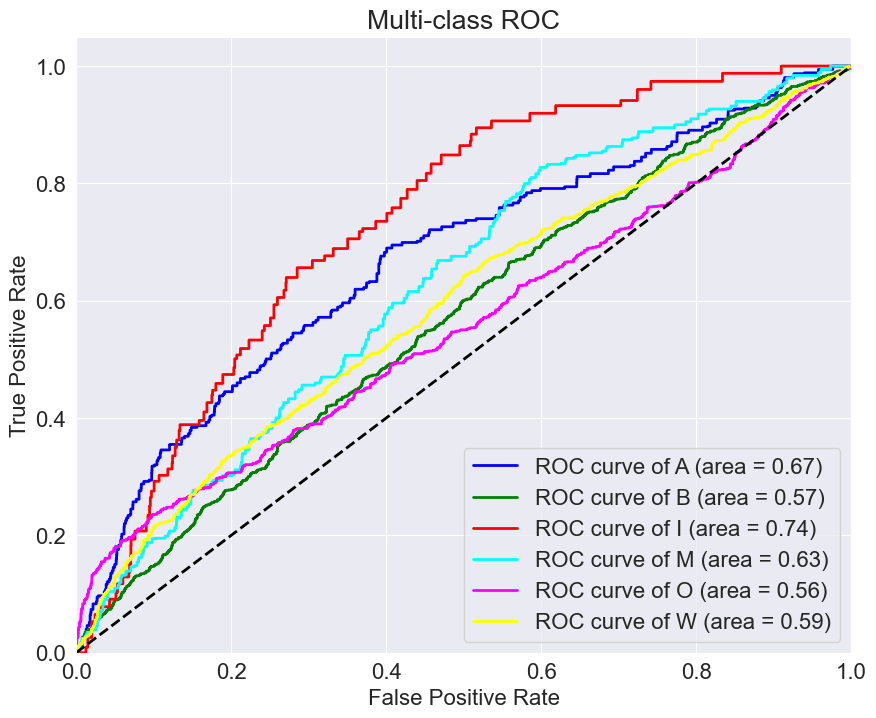

In [32]:
from sklearn.linear_model import LogisticRegression
X_test2 = print_res(LogisticRegression())